# Data 불러오기

In [9]:
data = open("data.log", "r")
for line in data:
    print(line)

File:20240624-164545_DecaWaveAllAccum.log, created by DecaRanging MP Version 3.05 (build:Jun 24 2024, 15:56:00)

Mode: 1, Chan 2, Code 9, PRF 64, Plength 1024, DataRate 1, PAC 2, ic:54a20ea7, ucode:xxxx, antdl:80A4



TX Frame TimeStamp Raw  = 99 144CDA52

   Adding Antenna Delay = 0099 144CDA52

13 Tx time = 1.028944087468074e+01

-7,1,-60,128,174,38,-53,44,75,-86,-3,-133,-50,91,74,138,98,-5,80,8,18,55,33,17,43,85,21,120,39,151,79,-118,-88,-44,-56,58,25,24,1,-5,75,83,-35,26,26,79,59,110,197,318,407,102,-258,-336,-129,245,253,-78,-346,-145,76,102,59,117,66,56,57,115,77,51,161,-31,-4,23,196,140,-144,-79,78,171,-20,-55,-123,-181,-30,76,64,-63,-118,-31,159,1,-9,35,244,247,24,-139,46,163,16,18,18,86,184,-59,-146,-105,146,338,100,-163,-43,237,218,33,51,223,301,103,-160,-48,-27,56,-109,65,37,1,-25,57,198,145,-22,-165,-282,-79,141,134,-45,154,189,132,23,-111,149,122,9,-18,134,60,-73,-40,-8,145,161,89,15,93,85,90,83,69,52,41,62,124,92,71,54,110,28,-66,136,27,-66,-60,43,66,103,-61,155,52,78,41,

In [142]:
# 끝자리가 7로 끝나는 데이터만 가져오기
data = open("data.log", "r")
data_log = []
i = 0

for line in data:
    i += 1
    if i<459:
        if i % 10 == 7:
            data_log.append((line))
    else:
        if i % 10 == 1:
            data_log.append((line))

print(data_log)

['-7,1,-60,128,174,38,-53,44,75,-86,-3,-133,-50,91,74,138,98,-5,80,8,18,55,33,17,43,85,21,120,39,151,79,-118,-88,-44,-56,58,25,24,1,-5,75,83,-35,26,26,79,59,110,197,318,407,102,-258,-336,-129,245,253,-78,-346,-145,76,102,59,117,66,56,57,115,77,51,161,-31,-4,23,196,140,-144,-79,78,171,-20,-55,-123,-181,-30,76,64,-63,-118,-31,159,1,-9,35,244,247,24,-139,46,163,16,18,18,86,184,-59,-146,-105,146,338,100,-163,-43,237,218,33,51,223,301,103,-160,-48,-27,56,-109,65,37,1,-25,57,198,145,-22,-165,-282,-79,141,134,-45,154,189,132,23,-111,149,122,9,-18,134,60,-73,-40,-8,145,161,89,15,93,85,90,83,69,52,41,62,124,92,71,54,110,28,-66,136,27,-66,-60,43,66,103,-61,155,52,78,41,-73,87,95,-112,-119,35,75,-7,-258,-236,62,255,144,73,4,190,130,50,-18,38,113,91,-19,73,69,96,-55,-83,-30,89,18,100,154,214,135,97,31,28,51,104,124,171,39,2,98,24,-33,0,8,102,112,-26,13,32,50,28,36,39,179,80,0,33,165,139,133,26,-88,55,76,77,109,134,106,139,40,36,49,122,-77,-121,-109,48,61,59,38,-3,-24,55,121,31,-13,111,52,124,-15,-

In [143]:
# 데이터의 개수 출력    
len(data_log)

101

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [144]:
data_log = pd.DataFrame(data_log)
print(data_log.shape)
data_log.head()

(101, 1)


,0
0,"-7,1,-60,128,174,38,-53,44,75,-86,-3,-133,-50,..."
1,"74,114,110,123,151,143,118,-66,-27,48,26,-52,-..."
2,"-1,161,138,-201,-143,177,23,-135,233,90,-13,18..."
3,"-46,-115,-75,-18,9,-31,-25,36,71,85,14,46,80,4..."
4,"-34,28,60,-59,-20,45,66,74,41,-83,45,111,151,8..."


In [145]:
data_log[0][45]

'\n'

In [136]:
print(len(data_log[0][0]))
print(len(data_log[0][1]))

3711
3685


In [137]:
# 빈 문자열을 제외하고 숫자로만 구성된 문자열을 정수로 변환
data_sample = [int(x) for x in data_log[0][0].strip().split(",") if x]
print(data_sample)
len(data_sample)

[-7, 1, -60, 128, 174, 38, -53, 44, 75, -86, -3, -133, -50, 91, 74, 138, 98, -5, 80, 8, 18, 55, 33, 17, 43, 85, 21, 120, 39, 151, 79, -118, -88, -44, -56, 58, 25, 24, 1, -5, 75, 83, -35, 26, 26, 79, 59, 110, 197, 318, 407, 102, -258, -336, -129, 245, 253, -78, -346, -145, 76, 102, 59, 117, 66, 56, 57, 115, 77, 51, 161, -31, -4, 23, 196, 140, -144, -79, 78, 171, -20, -55, -123, -181, -30, 76, 64, -63, -118, -31, 159, 1, -9, 35, 244, 247, 24, -139, 46, 163, 16, 18, 18, 86, 184, -59, -146, -105, 146, 338, 100, -163, -43, 237, 218, 33, 51, 223, 301, 103, -160, -48, -27, 56, -109, 65, 37, 1, -25, 57, 198, 145, -22, -165, -282, -79, 141, 134, -45, 154, 189, 132, 23, -111, 149, 122, 9, -18, 134, 60, -73, -40, -8, 145, 161, 89, 15, 93, 85, 90, 83, 69, 52, 41, 62, 124, 92, 71, 54, 110, 28, -66, 136, 27, -66, -60, 43, 66, 103, -61, 155, 52, 78, 41, -73, 87, 95, -112, -119, 35, 75, -7, -258, -236, 62, 255, 144, 73, 4, 190, 130, 50, -18, 38, 113, 91, -19, 73, 69, 96, -55, -83, -30, 89, 18, 100, 15

1016

<Axes: >

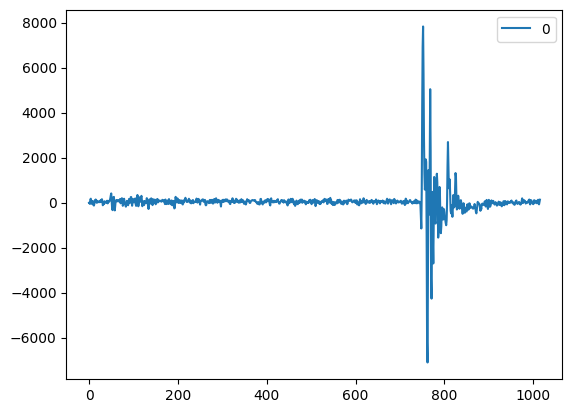

In [19]:
data_sample = pd.DataFrame(data_sample)
data_sample.plot()

In [34]:
data_after_pick = []
raw_data = []

for i in range(len(data_log)):
    data_sample = [int(x) for x in data_log[0][i].strip().split(",") if x]
    index = 0
    for k in range(len(data_sample)):
        if data_sample[k] > 1000:
            index = k
            break
    raw_data.append(data_sample)
    data_sample = data_sample[index:index+250]
    data_after_pick.append(data_sample)

In [35]:
print(len(data_after_pick))
print(len(data_after_pick[0]))
print(len(raw_data))
print(len(raw_data[0]))

101
250
101
1016


In [37]:
# raw_data를 파일에 저장하기
raw_data = pd.DataFrame(raw_data)
raw_data.to_csv("raw_data.csv", index=False)
data_after_pick = pd.DataFrame(data_after_pick)
data_after_pick.to_csv("data_after_pick.csv", index=False)

In [38]:
raw_data

,0,1,2,3,4,5,6,7,8,9,...,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015
0,-7.0,1.0,-60.0,128.0,174.0,38.0,-53.0,44.0,75.0,-86.0,...,84.0,11.0,-29.0,51.0,67.0,127.0,-43.0,-77.0,35.0,129.0
1,74.0,114.0,110.0,123.0,151.0,143.0,118.0,-66.0,-27.0,48.0,...,74.0,25.0,183.0,83.0,25.0,-13.0,59.0,75.0,-41.0,-107.0
2,-1.0,161.0,138.0,-201.0,-143.0,177.0,23.0,-135.0,233.0,90.0,...,-32.0,-23.0,96.0,-39.0,121.0,167.0,70.0,-91.0,89.0,78.0
3,-46.0,-115.0,-75.0,-18.0,9.0,-31.0,-25.0,36.0,71.0,85.0,...,31.0,-40.0,-41.0,57.0,82.0,-41.0,21.0,21.0,99.0,-56.0
4,-34.0,28.0,60.0,-59.0,-20.0,45.0,66.0,74.0,41.0,-83.0,...,-18.0,115.0,222.0,91.0,204.0,9.0,-127.0,3.0,63.0,-87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-161.0,-54.0,105.0,77.0,156.0,36.0,127.0,66.0,-38.0,-38.0,...,44.0,-87.0,-15.0,-34.0,74.0,-32.0,43.0,168.0,161.0,13.0
97,34.0,10.0,16.0,-3.0,74.0,80.0,17.0,3.0,-3.0,19.0,...,-7.0,215.0,73.0,40.0,-2.0,21.0,150.0,-22.0,-38.0,78.0
98,72.0,32.0,155.0,64.0,102.0,19.0,-63.0,-19.0,32.0,53.0,...,22.0,64.0,34.0,-20.0,121.0,33.0,-33.0,34.0,-10.0,25.0
99,116.0,56.0,0.0,16.0,-12.0,-45.0,39.0,10.0,-4.0,94.0,...,150.0,87.0,175.0,-25.0,-123.0,26.0,104.0,46.0,47.0,123.0


# CIR-Based Device-Free People Counting via UWB Signals

In those Figures, CIRs have been averaged over the captured frames (i.e., 1768) and plotted from sample 740 to sample 800 of the 1000-samples long vector extracted from the device. It is worth highlighting that before sample 740, CIR amplitudes stored in the extracted CIR vector are zero. Moreover, from Figure 3 and Figure 4, it is evident that already before sample 800, there are no more significant signal replicas and the CIR vector contains mainly noise. Therefore, in the following, we work with 60 samples long CIR vectors (from sample 740 to sample 800).

In [43]:
raw_data.shape

(101, 1016)

<Axes: >

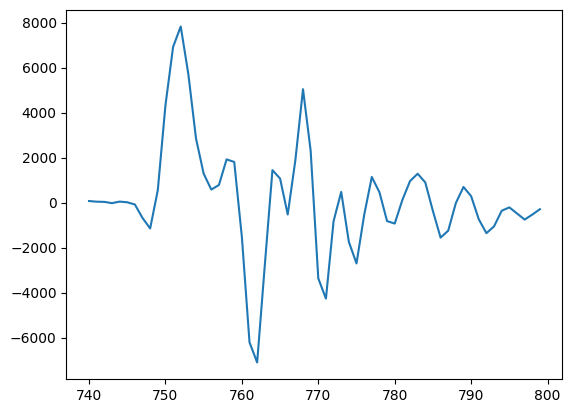

In [83]:
# raw_data의 첫번째 행을 그래프로 그리기
raw_data.iloc[0][740:800].plot()

<Axes: >

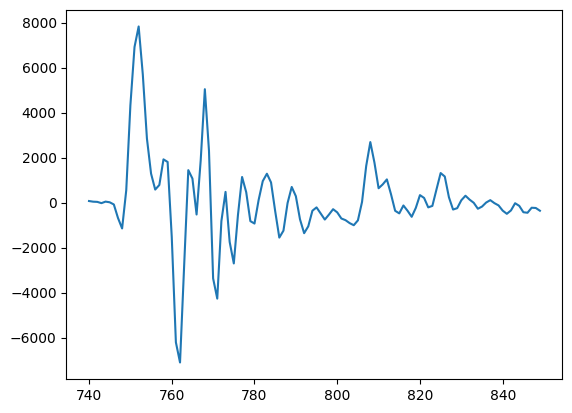

In [84]:
raw_data.iloc[0][740:850].plot()

논문에서는 800이후를 버렸지만 850까지 보겠음  
다음은 empty 상황의 초반 10개

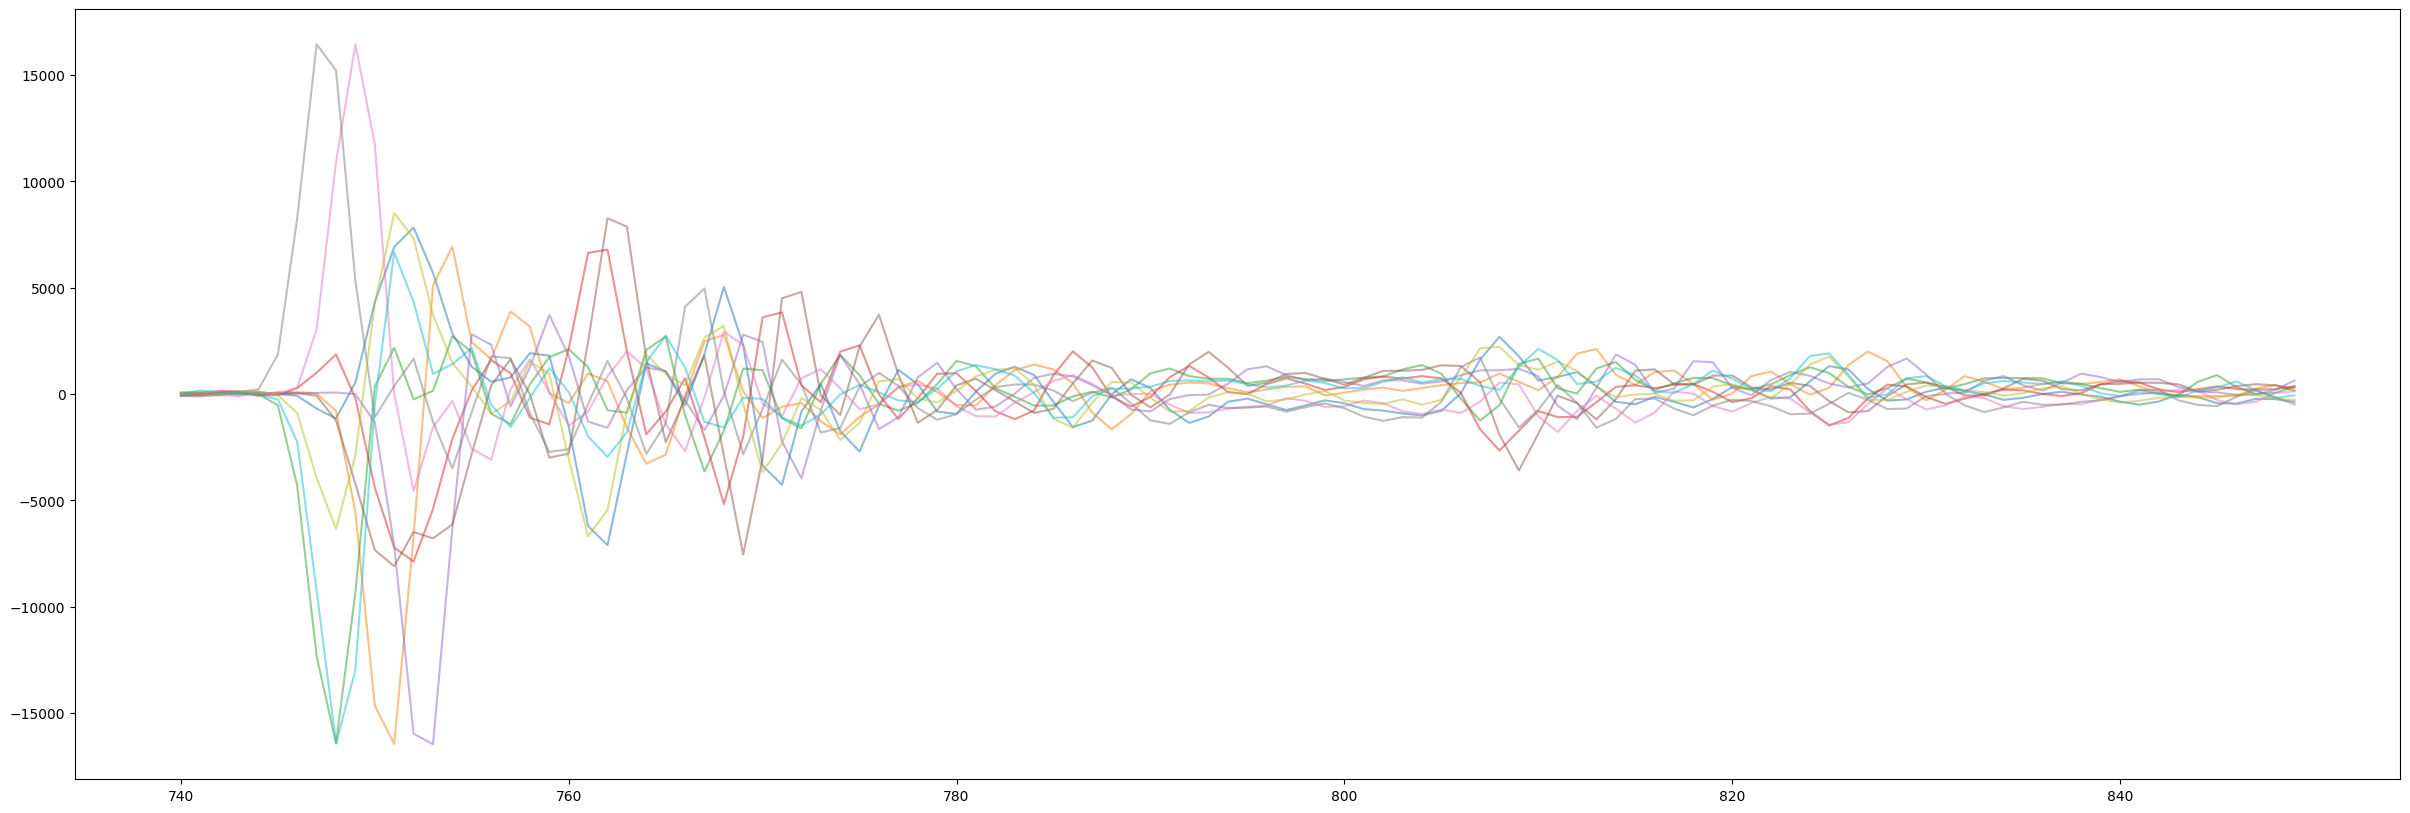

In [85]:
plt.figure(figsize=(30, 10))

for i in range(10):
    # 투명도 0.5로 그래프 그리기
    # matplotlib의 plot 함수를 사용
    plt.plot(raw_data.iloc[i][740:850], alpha=0.5)
plt.show()

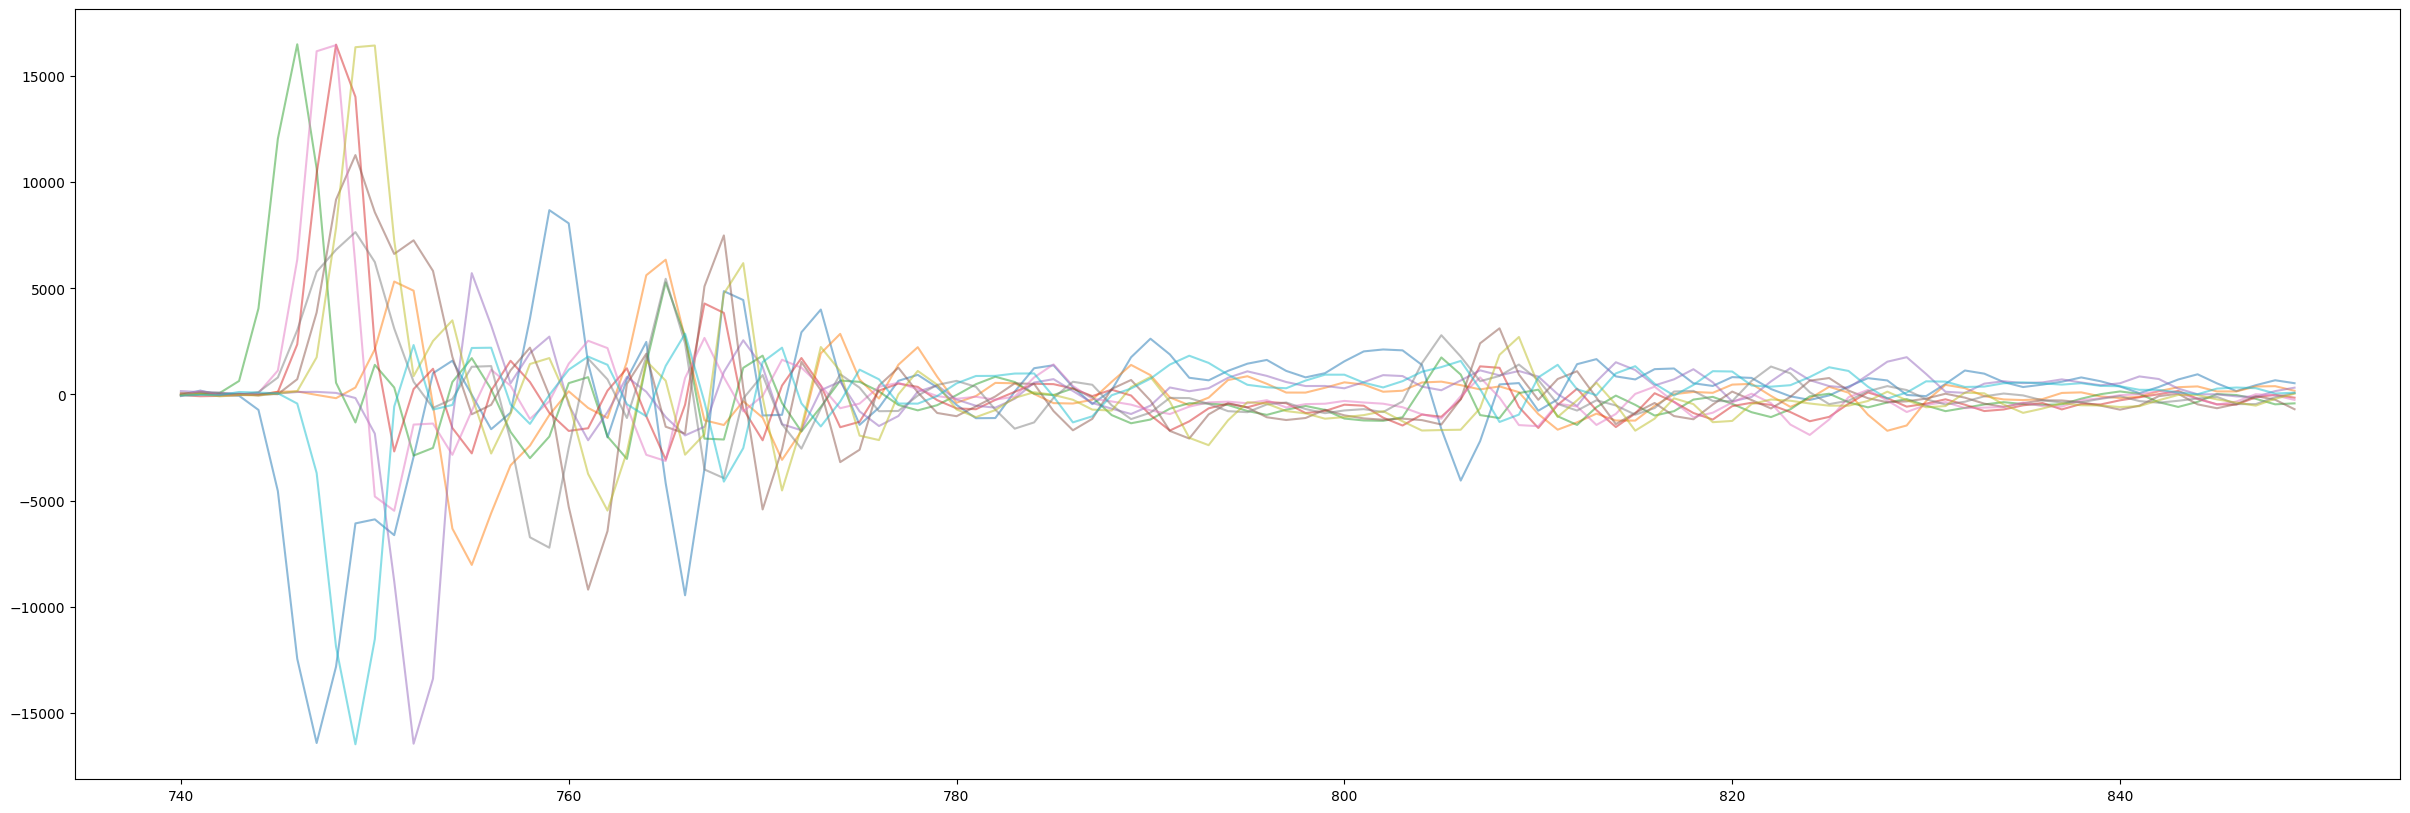

In [86]:
plt.figure(figsize=(30, 10))
for i in range(1,11):
    plt.plot(raw_data.iloc[-i][740:850], alpha=0.5)
plt.show()

## Normalized

In [92]:
# 각 행을 정규화
normalized_data = raw_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
normalized_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015
0,0.475352,0.475887,0.471802,0.484394,0.487475,0.478366,0.472271,0.478768,0.480844,0.470060,...,0.481447,0.476557,0.473878,0.479236,0.480308,0.484327,0.472940,0.470663,0.478165,0.484461
1,0.706614,0.708324,0.708153,0.708709,0.709906,0.709564,0.708495,0.700629,0.702296,0.705503,...,0.706614,0.704519,0.711275,0.706999,0.704519,0.702895,0.705973,0.706657,0.701697,0.698876
2,0.858053,0.866517,0.865315,0.847605,0.850635,0.867353,0.859307,0.851053,0.870278,0.862808,...,0.856434,0.856904,0.863121,0.856068,0.864427,0.866830,0.861763,0.853351,0.862755,0.862181
3,0.533683,0.528979,0.531706,0.535593,0.537434,0.534706,0.535115,0.539275,0.541661,0.542616,...,0.538934,0.534092,0.534024,0.540706,0.542411,0.534024,0.538252,0.538252,0.543570,0.533002
4,0.814079,0.817151,0.818736,0.812841,0.814773,0.817993,0.819033,0.819429,0.817795,0.811652,...,0.814872,0.821460,0.826761,0.820271,0.825869,0.816209,0.809472,0.815912,0.818884,0.811453


<Axes: >

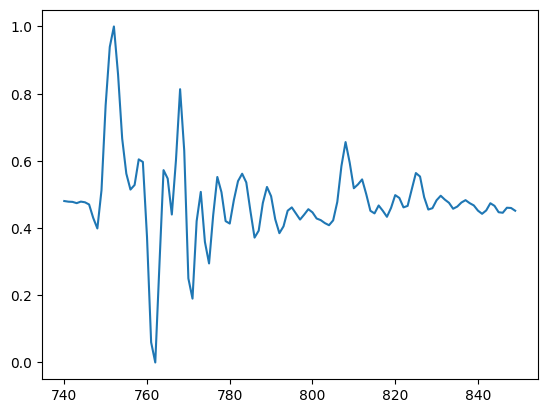

In [93]:
normalized_data.iloc[0][740:850].plot()

그냥 정규화 하면 논문에서의 데이터와 약간 모양이 다름, 그래서 residual을 갖고, 정규화 하겠음

## Residual Normalized

In [96]:
residual = pd.DataFrame()

# raw_data의 마지막 열을 제외한 모든 열에 대해 반복
for i in range(raw_data.shape[1] - 1):
    # 현재 열과 다음 열의 차이를 계산하고 새로운 열로 추가
    residual[i] = raw_data.iloc[:, i] - raw_data.iloc[:, i + 1]

residual.head()

/var/folders/hy/ck_cnk9d1sdgdn5rb8hh_t5h0000gn/T/ipykernel_60094/3106672466.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual[i] = raw_data.iloc[:, i] - raw_data.iloc[:, i + 1]


,0,1,2,3,4,5,6,7,8,9,...,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014
0,-8.0,61.0,-188.0,-46.0,136.0,91.0,-97.0,-31.0,161.0,-83.0,...,-36.0,73.0,40.0,-80.0,-16.0,-60.0,170.0,34.0,-112.0,-94.0
1,-40.0,4.0,-13.0,-28.0,8.0,25.0,184.0,-39.0,-75.0,22.0,...,-105.0,49.0,-158.0,100.0,58.0,38.0,-72.0,-16.0,116.0,66.0
2,-162.0,23.0,339.0,-58.0,-320.0,154.0,158.0,-368.0,143.0,103.0,...,212.0,-9.0,-119.0,135.0,-160.0,-46.0,97.0,161.0,-180.0,11.0
3,69.0,-40.0,-57.0,-27.0,40.0,-6.0,-61.0,-35.0,-14.0,71.0,...,38.0,71.0,1.0,-98.0,-25.0,123.0,-62.0,0.0,-78.0,155.0
4,-62.0,-32.0,119.0,-39.0,-65.0,-21.0,-8.0,33.0,124.0,-128.0,...,60.0,-133.0,-107.0,131.0,-113.0,195.0,136.0,-130.0,-60.0,150.0


<Axes: >

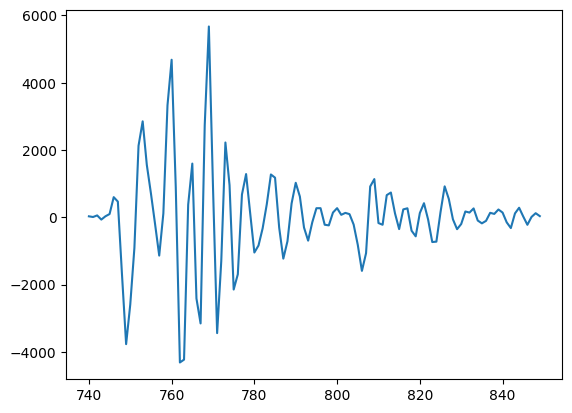

In [97]:
residual.iloc[0][740:850].plot()

<Axes: >

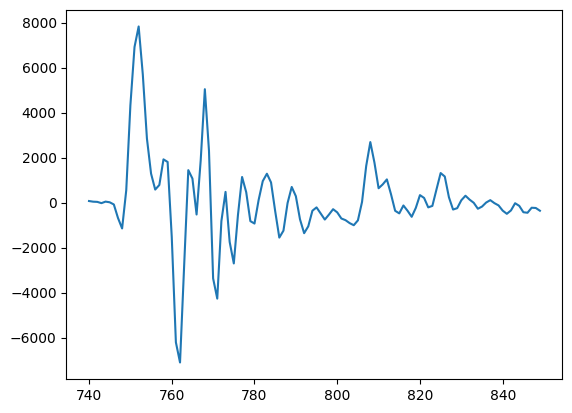

In [98]:
raw_data.iloc[0][740:850].plot()

이것도 그림이 약간 아닌거 같은디...

## Abs, Normalized

<Axes: >

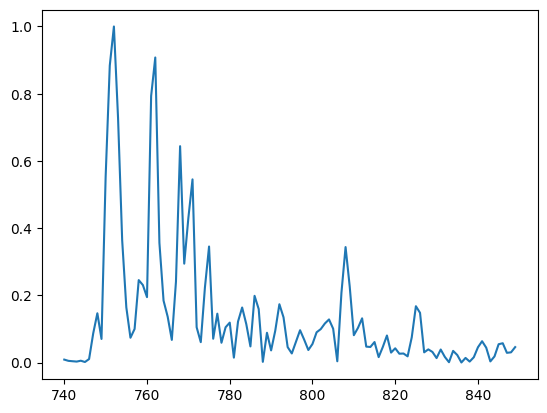

In [113]:
abs_normalized_data = raw_data.abs()
abs_normalized_data = abs_normalized_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
abs_normalized_data.iloc[0][740:850].plot()

얼추 비슷해진듯

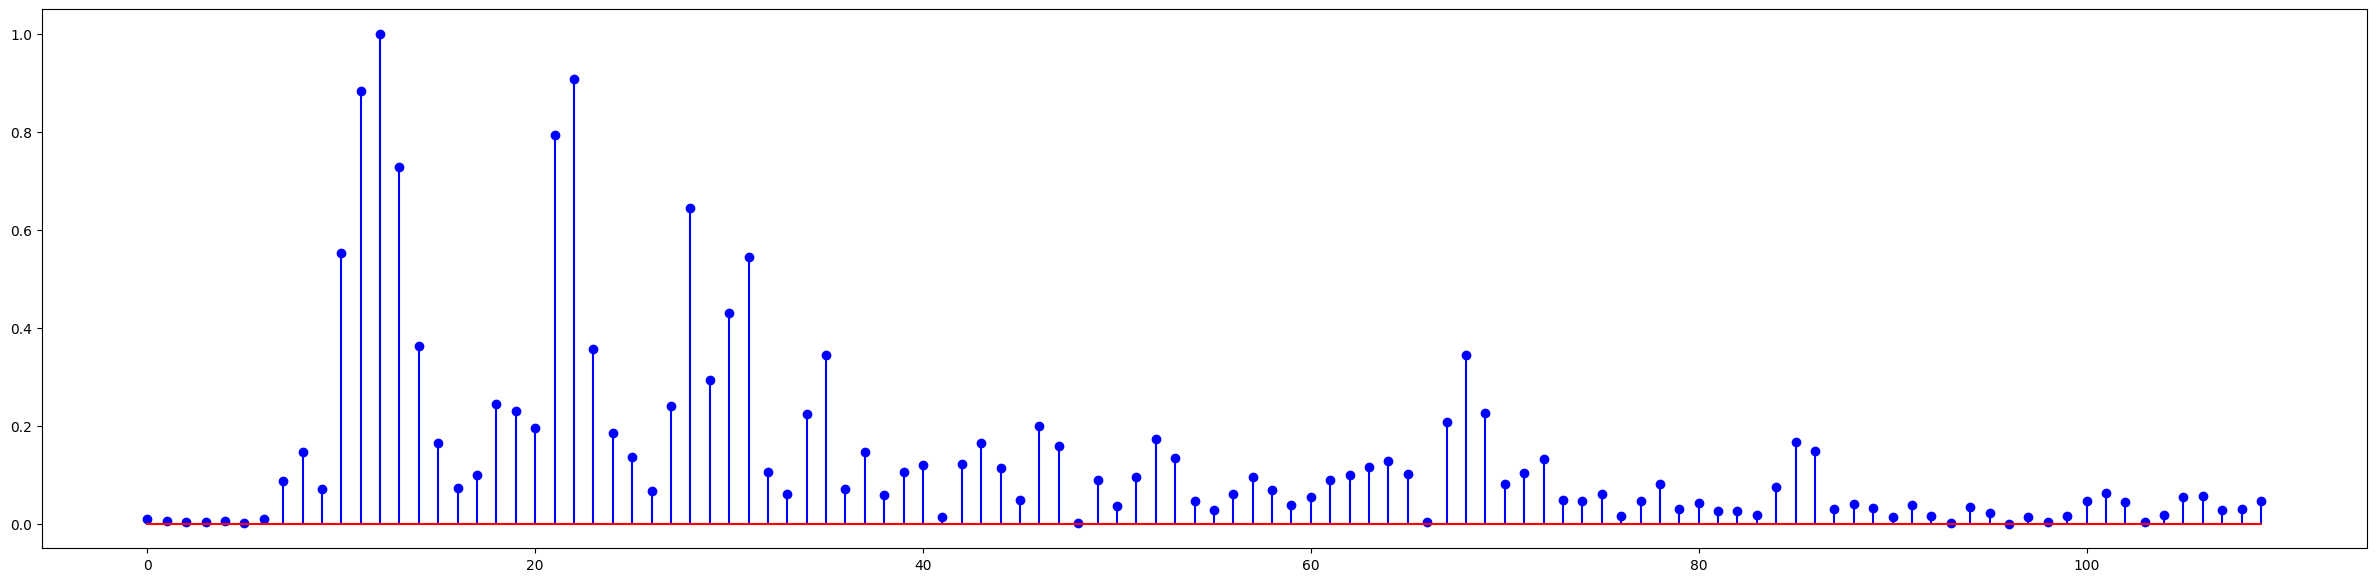

In [116]:
# 그래프 모양을 약간 보기좋게
plt.figure(figsize=(30, 7))
plt.stem(abs_normalized_data.iloc[0][740:850], linefmt='b-', markerfmt='bo', basefmt='r-')
plt.show()

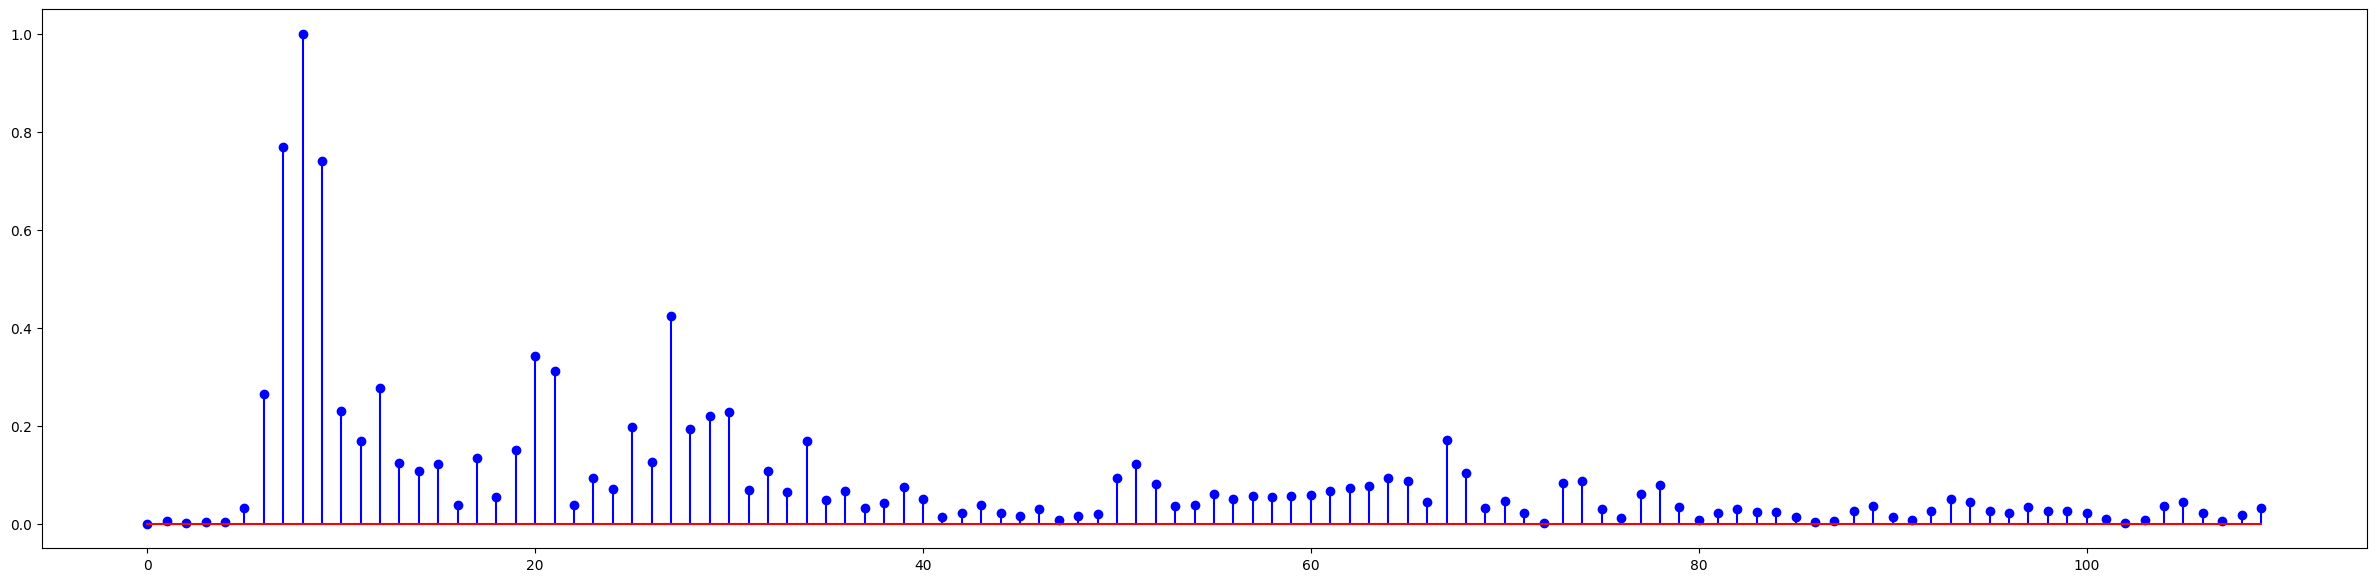

In [117]:
# 이부분은 사람이 있던 경우로 아마 추정
plt.figure(figsize=(30, 7))
plt.stem(abs_normalized_data.iloc[70][740:850], linefmt='b-', markerfmt='bo', basefmt='r-')
plt.show()

솔직히 한두개 봐서는 모르겠음, 그냥 plot으로 중첩해서 봐야할 듯

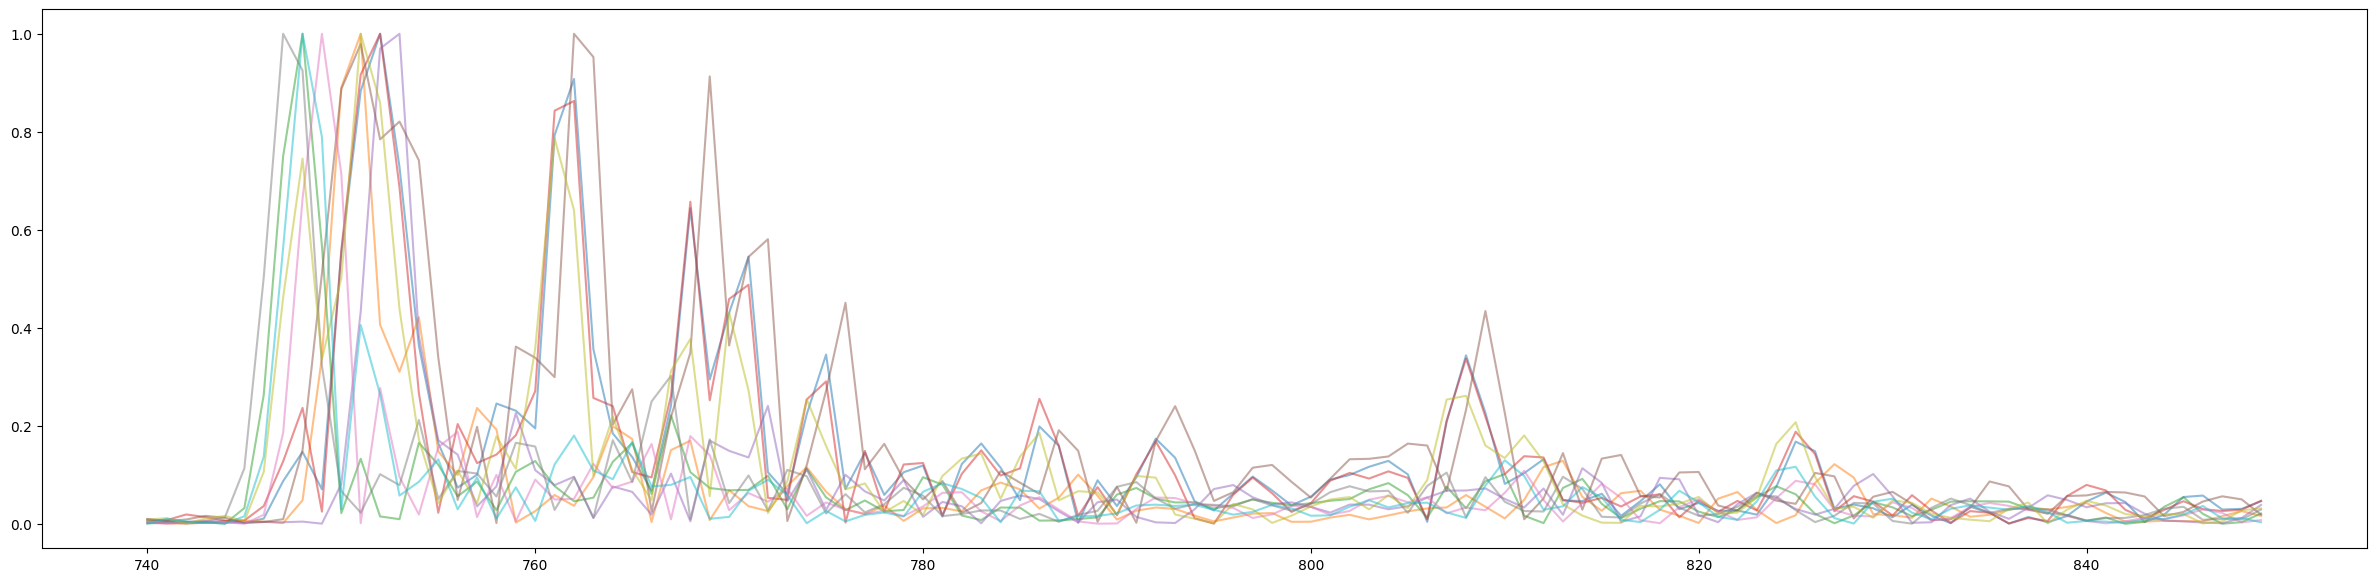

In [118]:
plt.figure(figsize=(30, 7))
for i in range(10):
    plt.plot(abs_normalized_data.iloc[i][740:850], alpha=0.5)
plt.show()

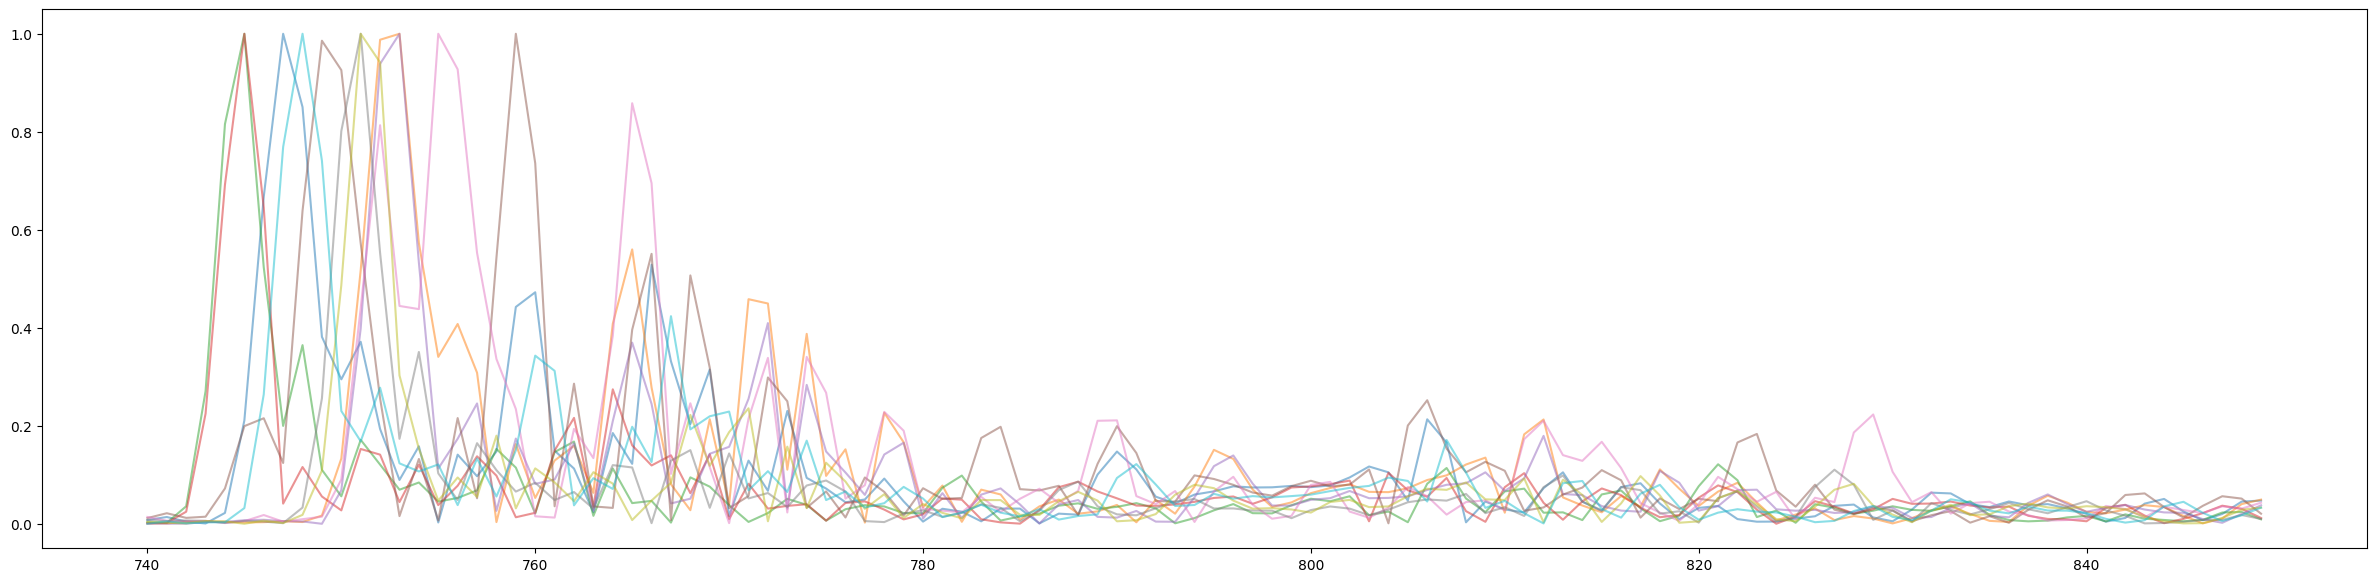

In [119]:
plt.figure(figsize=(30, 7))
for i in range(61, 71):
    plt.plot(abs_normalized_data.iloc[i][740:850], alpha=0.5)
plt.show()

본 논문에서는 dicision tree와 naive bayes classifier를 사용해 분석함, 이때 y값은 사람의 수

In [124]:
abs_normal_740_850 = abs_normalized_data.iloc[:, 740:850]
print(abs_normal_740_850.shape)
abs_normal_740_850.head()

(101, 110)


,740,741,742,743,744,745,746,747,748,749,...,840,841,842,843,844,845,846,847,848,849
0,0.008945,0.005239,0.004089,0.003067,0.005622,0.001789,0.010606,0.087145,0.146818,0.070406,...,0.045617,0.063634,0.044467,0.003578,0.018400,0.054689,0.057628,0.029134,0.030539,0.046128
1,0.002917,0.000669,0.000425,0.002249,0.005227,0.006503,0.004741,0.001459,0.048016,0.339756,...,0.042363,0.022063,0.004741,0.004558,0.006199,0.005592,0.005166,0.015620,0.025892,0.016228
2,0.000731,0.002374,0.003105,0.003470,0.000122,0.032085,0.263196,0.750015,1.000000,0.567184,...,0.006271,0.012907,0.000061,0.003957,0.034521,0.054307,0.020396,0.000183,0.003409,0.021065
3,0.007494,0.007494,0.019052,0.013591,0.006859,0.006605,0.036327,0.127397,0.236505,0.024895,...,0.079385,0.068081,0.028579,0.011050,0.028198,0.046107,0.029849,0.026165,0.028706,0.046996
4,0.002247,0.002854,0.000911,0.002490,0.001943,0.002733,0.003765,0.003219,0.004494,0.000304,...,0.033764,0.041963,0.042266,0.020465,0.006498,0.004919,0.002551,0.001154,0.011903,0.038501


In [129]:
# Na 확인
abs_normal_740_850.isna().sum()
# NaN 위치 확인
abs_normal_740_850[abs_normal_740_850.isna().any(axis=1)]

,740,741,742,743,744,745,746,747,748,749,...,840,841,842,843,844,845,846,847,848,849
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
# NaN 제거
abs_normal_740_850 = abs_normal_740_850.dropna()

In [147]:
# 우리는 비지도 학습을 통해 cluster를 찾아내고자 한다.
from sklearn.cluster import KMeans

# cluster의 개수를 2개로 설정
kmeans = KMeans(n_clusters=2, random_state=42, max_iter=1000)
kmeans.fit(abs_normal_740_850)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=1000, n_clusters=2, random_state=42)

In [148]:
abs_normal_740_850["cluster"] = kmeans.labels_

/var/folders/hy/ck_cnk9d1sdgdn5rb8hh_t5h0000gn/T/ipykernel_60094/2438495516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abs_normal_740_850["cluster"] = kmeans.labels_


In [149]:
abs_normal_740_850.head()

,740,741,742,743,744,745,746,747,748,749,...,841,842,843,844,845,846,847,848,849,cluster
0,0.008945,0.005239,0.004089,0.003067,0.005622,0.001789,0.010606,0.087145,0.146818,0.070406,...,0.063634,0.044467,0.003578,0.018400,0.054689,0.057628,0.029134,0.030539,0.046128,1
1,0.002917,0.000669,0.000425,0.002249,0.005227,0.006503,0.004741,0.001459,0.048016,0.339756,...,0.022063,0.004741,0.004558,0.006199,0.005592,0.005166,0.015620,0.025892,0.016228,1
2,0.000731,0.002374,0.003105,0.003470,0.000122,0.032085,0.263196,0.750015,1.000000,0.567184,...,0.012907,0.000061,0.003957,0.034521,0.054307,0.020396,0.000183,0.003409,0.021065,0
3,0.007494,0.007494,0.019052,0.013591,0.006859,0.006605,0.036327,0.127397,0.236505,0.024895,...,0.068081,0.028579,0.011050,0.028198,0.046107,0.029849,0.026165,0.028706,0.046996,1
4,0.002247,0.002854,0.000911,0.002490,0.001943,0.002733,0.003765,0.003219,0.004494,0.000304,...,0.041963,0.042266,0.020465,0.006498,0.004919,0.002551,0.001154,0.011903,0.038501,1


In [150]:
group_1 = abs_normal_740_850[abs_normal_740_850["cluster"] == 0]
group_2 = abs_normal_740_850[abs_normal_740_850["cluster"] == 1]

In [152]:
group_1.shape, group_2.shape

((56, 111), (44, 111))

In [154]:
# gruop_1의 index를 확인
group_1.index, group_2.index

(Index([  2,   6,   7,   9,  14,  16,  17,  18,  19,  22,  23,  24,  28,  29,
         32,  34,  35,  37,  40,  46,  50,  51,  52,  53,  54,  55,  58,  59,
         60,  61,  63,  64,  66,  70,  71,  73,  75,  76,  77,  79,  80,  81,
         84,  85,  86,  87,  88,  90,  91,  92,  93,  94,  95,  97,  98, 100],
       dtype='int64'),
 Index([ 0,  1,  3,  4,  5,  8, 10, 11, 12, 13, 15, 20, 21, 25, 26, 27, 30, 31,
        33, 36, 38, 39, 41, 42, 43, 44, 47, 48, 49, 56, 57, 62, 65, 67, 68, 69,
        72, 74, 78, 82, 83, 89, 96, 99],
       dtype='int64'))

k-means로는 당연하게도 두개의 cluster가 이상하게 분류됨  
따라서, 다른 clustering 방법을 더 찾아보거나, 논문에서와 같이 지도학습을 해보는 것도 괜찮은 방법일 듯  
-> 장연씨가 다른 clustering 방법을 하고/ 나는 지도학습 시켜서, 두개의 차이를 유의미하게 분류할 수 있게 해보는 방향?